<a href="https://colab.research.google.com/github/laizzzzzz/AppDev1_Acts/blob/main/NOVINO%2CGELIZZAMARIE_FM_Text_Summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gelizza Marie Novino

BSIT

22011011210

In [1]:
!pip install -q transformers
!pip install -q youtube_transcript_api
!pip install -q gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 8.0 MB/s eta 0:00:00


In [2]:
import gradio as gr
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi
from IPython.display import YouTubeVideo

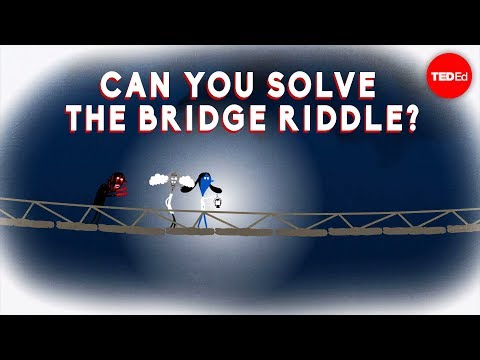

In [25]:
youtube_video = "https://www.youtube.com/watch?v=7yDmGnA8Hw0"
video_id = youtube_video.split("=")[1]
YouTubeVideo(video_id)

In [26]:
Transcript = YouTubeTranscriptApi.get_transcript(video_id)


In [27]:
model1 = "sshleifer/distilbart-cnn-12-6"
model2 = "tuner007/pegasus_summarizer"
model3 = "Falconsai/text_summarization"

In [28]:
summarizer = pipeline('summarization', model=model1)

In [29]:
prompt = "The summary should cover all the key points and main ideas presented in the original text,"\
          "while also condensing the info into a concise and best format."

In [30]:
transcript_text = ""
for i in Transcript:
  transcript_text += '' + i['text']

In [31]:
prompted_text = prompt + transcript_text

In [32]:
num_iters = int(len(prompted_text)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i + 1000
  end = (i + i) * 1000
  print("Input text:\n" + prompted_text[start:end])
  out = summarizer(prompted_text[start:end])
  out = out[0]
  out = out['summary_text']
  print("Summarized text:\n" + out)
  summarized_text.append(out)

str(summarized_text)

Your max_length is set to 142, but your input_length is only 3. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=1)


Input text:

Summarized text:
 CNN.com will feature iReporter photos in a weekly Travel Snapshots gallery . Please submit your best shots of our featured destinations for next week . Visit CNN iReport.com/Travel next Wednesday for a new gallery of snapshots . Visit www.dailyimpact.com for a gallery next week for snapshots .
Input text:
e bridge can only hold
two people at a time.To make matters worse,it's so dark out that you can barely see,and the old lantern you grabbed on
your way only illuminates a tiny area.Can you figure out a way
to have everyone escape in time?Remember: no more than two people
can cross the bridge together,anyone crossing must either
hold the lantern or stay right next to it,and any of you can safely wait in the dark
on either side of the gorge.Most importantly, everyone must be
safely across before the zombies arrive.Otherwise, the first zombie could step on
the bridge while people are still on it.Finally, there are no tricks to use here.You can't swing across

'[\' CNN.com will feature iReporter photos in a weekly Travel Snapshots gallery . Please submit your best shots of our featured destinations for next week . Visit CNN iReport.com/Travel next Wednesday for a new gallery of snapshots . Visit www.dailyimpact.com for a gallery next week for snapshots .\', " Can you figure out a way to have everyone escape in time? Remember: no more than two people can cross the bridge together, anyone crossing must either hold the lantern or stay right next to it . Everyone must be safely across before the zombies arrive . There are no tricks to use here. You can\'t swing across, use the bridge as a raft, or befriend the zombies .", \' Can you figure out a way to have everyone escape in time? Remember: no more than two people can cross the bridge together . Anyone crossing must either hold the lantern or stay right next to it, and any of you can safely wait in the dark on either side of the gorge . Everyone must be safely across before the zombies arrive .

In [33]:
len(str(summarized_text))

1324

In [34]:
str(summarized_text)

'[\' CNN.com will feature iReporter photos in a weekly Travel Snapshots gallery . Please submit your best shots of our featured destinations for next week . Visit CNN iReport.com/Travel next Wednesday for a new gallery of snapshots . Visit www.dailyimpact.com for a gallery next week for snapshots .\', " Can you figure out a way to have everyone escape in time? Remember: no more than two people can cross the bridge together, anyone crossing must either hold the lantern or stay right next to it . Everyone must be safely across before the zombies arrive . There are no tricks to use here. You can\'t swing across, use the bridge as a raft, or befriend the zombies .", \' Can you figure out a way to have everyone escape in time? Remember: no more than two people can cross the bridge together . Anyone crossing must either hold the lantern or stay right next to it, and any of you can safely wait in the dark on either side of the gorge . Everyone must be safely across before the zombies arrive .

In [35]:
def summarize_youtube_video(youtube_video):
    # Extract video ID from the YouTube video URL
    video_id = youtube_video.split("=")[1]

    # Retrieve the transcript of the YouTube video
    transcript = YouTubeTranscriptApi.get_transcript(video_id)

    # Concatenate all text from the transcript
    transcript_text = ' '.join([i['text'] for i in transcript])

    # Initialize the summarization pipeline
    model = "sshleifer/distilbart-cnn-12-6"
    # model = "tuner007/pegasus_summarizer"
    summarizer = pipeline('summarization', model=model)

    # TO DO: Define/replace the prompt text
    prompt = "The summary should cover all the key points and main ideas presented in the original text," \
          "while also condensing the information into a concise and easy-to-understand format."

    # Concatenate prompt text with transcript text
    prompted_text = prompt + transcript_text

    # Initialize an empty string to store the summarized text
    summarized_text = ""

    # Set the maximum chunk size for summarization
    max_chunk_size = 1000

    # Iterate through chunks of prompted text and summarize each chunk
    for i in range(0, len(prompted_text), max_chunk_size):
        chunk = prompted_text[i:i+max_chunk_size]
        out = summarizer(chunk, max_length=150, min_length=30, do_sample=False)[0]
        summarized_text += out['summary_text'] + " "

    return summarized_text

In [ ]:
# Create a Gradio interface
iface = gr.Interface(
    fn=summarize_youtube_video,
    inputs=gr.Textbox(label="Insert YouTube Video Link Here"),
    outputs=gr.Textbox(label="Summarized Text", lines=5),
    title="VideoDigest", # TO DO: Replace with your preferred title
    description="Enter a YouTube video link to summarize its content.",
    examples=["https://www.youtube.com/watch?v=ixIoDYVfKA0"] # TO DO: Replace with your preferred video link
)

# Launch the interface
iface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://4cdf4e5b59a9258fde.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
